# **Lexicon**

In [1]:
import numpy as np
import pandas as pd

### Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### DB 연결
# !pip install pymysql
import pymysql

### DB에 저장
import sqlalchemy
from sqlalchemy import create_engine

### 실시간 주식가격 데이터
# !pip install finance-datareader
import FinanceDataReader as fdr

### 텍스트 분석
## KoNLPy
# 1) JAVA 설치, 2) Python 버전과 맞는 JPype1-py3 설치, 3) !pip install konlpy, 4) 설치 경로에서 jvm.py 파일 코드 67번 줄 주석 처리 
from konlpy.tag import Okt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import re
## FastText
# !pip install gensim
# !pip install fasttext
import fasttext
import fasttext.util
# Facebook 한국어 Embedding 모델 다운로드 → 한 번만 설치하면 됨
# fasttext.util.download_model('ko', if_exists='ignore')   # FastText 모델 사용 시에만 필요
# 유사도 계산
from gensim import models

### 모델 학습 및 평가
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score

### 모델 저장 및 로드
import joblib

### 기타
import datetime
from collections import Counter
import sys
import warnings
warnings.filterwarnings('ignore')

## **Read Data**

In [5]:
samsung_news_50 = pd.read_csv('../../../../Code/Lexicon/samsung_news_50.csv')
samsung_news_60 = pd.read_csv('../../../../Code/Lexicon/samsung_news_60.csv')
samsung_news_65 = pd.read_csv('../../../../Code/Lexicon/samsung_news_65.csv')
samsung_news_70 = pd.read_csv('../../../../Code/Lexicon/samsung_news_70.csv')

hyundai_news_50 = pd.read_csv('../../../../Code/Lexicon/hyundai_news_50.csv')
hyundai_news_60 = pd.read_csv('../../../../Code/Lexicon/hyundai_news_60.csv')
hyundai_news_65 = pd.read_csv('../../../../Code/Lexicon/hyundai_news_65.csv')
hyundai_news_70 = pd.read_csv('../../../../Code/Lexicon/hyundai_news_70.csv')

lg_news_50 = pd.read_csv('../../../../Code/Lexicon/lg_news_50.csv')
lg_news_60 = pd.read_csv('../../../../Code/Lexicon/lg_news_60.csv')
lg_news_65 = pd.read_csv('../../../../Code/Lexicon/lg_news_65.csv')
lg_news_70 = pd.read_csv('../../../../Code/Lexicon/lg_news_70.csv')

sk_news_50 = pd.read_csv('../../../../Code/Lexicon/sk_news_50.csv')
sk_news_60 = pd.read_csv('../../../../Code/Lexicon/sk_news_60.csv')
sk_news_65 = pd.read_csv('../../../../Code/Lexicon/sk_news_65.csv')
sk_news_70 = pd.read_csv('../../../../Code/Lexicon/sk_news_70.csv')

celltrion_news_50 = pd.read_csv('../../../../Code/Lexicon/celltrion_news_50.csv')
celltrion_news_60 = pd.read_csv('../../../../Code/Lexicon/celltrion_news_60.csv')
celltrion_news_65 = pd.read_csv('../../../../Code/Lexicon/celltrion_news_65.csv')
celltrion_news_70 = pd.read_csv('../../../../Code/Lexicon/celltrion_news_70.csv')

## **Accuracy**

In [7]:
corp_list = ['samsung', 'hyundai', 'lg', 'sk', 'celltrion']
similar = ['50', '60', '65', '70']

# Accuracy 확인
for i in range(len(corp_list)):
    if corp_list[i] == 'samsung':
        corp = 'SAMSUNG'
    elif corp_list[i] == 'hyundai':
        corp = 'HYUNDAI'
    elif corp_list[i] == 'lg':
        corp = 'LG'
    elif corp_list[i] == 'sk':
        corp = 'SK'
    else:
        corp = 'CELLTRION'
        
    for j in range(len(similar)):
        print("Lexicon of {}({}%)'s Accuracy : {}".format(corp, similar[j], (len(globals()[corp_list[i] + '_news_' + similar[j]][(globals()[corp_list[i] + '_news_' + similar[j]]['UpDown']>=0) & (globals()[corp_list[i] + '_news_' + similar[j]]['Pred']>=0)]) + len(globals()[corp_list[i] + '_news_' + similar[j]][(globals()[corp_list[i] + '_news_' + similar[j]]['UpDown']<0) & (globals()[corp_list[i] + '_news_' + similar[j]]['Pred']<0)])) / len(globals()[corp_list[i] + '_news_' + similar[j]]['Pred'])))
    
    print('\n==================================================\n')

Lexicon of SAMSUNG(50%)'s Accuracy : 0.4962393774623124
Lexicon of SAMSUNG(60%)'s Accuracy : 0.4963696154722756
Lexicon of SAMSUNG(65%)'s Accuracy : 0.4968905675121284
Lexicon of SAMSUNG(70%)'s Accuracy : 0.4989092566665581


Lexicon of HYUNDAI(50%)'s Accuracy : 0.46895886889460153
Lexicon of HYUNDAI(60%)'s Accuracy : 0.46503856041131103
Lexicon of HYUNDAI(65%)'s Accuracy : 0.462853470437018
Lexicon of HYUNDAI(70%)'s Accuracy : 0.4645886889460154


Lexicon of LG(50%)'s Accuracy : 0.5165836298932385
Lexicon of LG(60%)'s Accuracy : 0.511459074733096
Lexicon of LG(65%)'s Accuracy : 0.5079003558718861
Lexicon of LG(70%)'s Accuracy : 0.5047686832740214


Lexicon of SK(50%)'s Accuracy : 0.49957654033453314
Lexicon of SK(60%)'s Accuracy : 0.5003175947491002
Lexicon of SK(65%)'s Accuracy : 0.49978827016726657
Lexicon of SK(70%)'s Accuracy : 0.49576540334533137


Lexicon of CELLTRION(50%)'s Accuracy : 0.4913294797687861
Lexicon of CELLTRION(60%)'s Accuracy : 0.4977979631158822
Lexicon of CELLTR

In [11]:
samsung_news_60.head(1)

,st_n,st_cd,news,datetime,title,url,text,date,time,Open,...,Close,Volume,Change,UpDown,Extremely_Changed,Tokenization,Positive_Score,Negative_Score,Ratio,Pred
0,삼성전자,5930,매일경제,2018010100,스마트베타ETF 고공행진 새해도 이어질까,http://news.mk.co.kr/newsRead.php?year=2018&no=29,\n\n\n 수수료가 싼 상장지수펀드(ETF)에 펀드매니저가 종목을 고르는 액티브 ...,2018-01-02,0,51380,...,51020,169485,0.001177,1,0,수수료 상장 지수 펀드 펀드매니저 종목 액티브 펀드 특성 가미 스마트 베타 대한 목...,2,0,0.5,1


In [28]:
samsung_news_60['Pred2'] = 0

for i in range(len(samsung_news_60['Pred'])):
    if samsung_news_60['Ratio'][i] >= 0.65:
        samsung_news_60['Pred2'][i] = 1
    else:
        samsung_news_60['Pred2'][i] = -1

In [29]:
(len(samsung_news_60[(samsung_news_60['UpDown']>=0) & (samsung_news_60['Pred2']>=0)]) + len(samsung_news_60[(samsung_news_60['UpDown']<0) & (samsung_news_60['Pred2']<0)])) / len(samsung_news_60['Pred2'])

0.5079607983590011

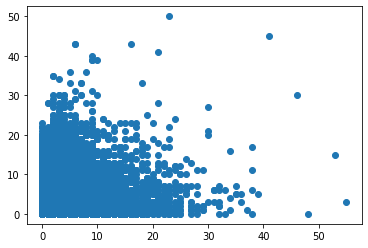

In [12]:
plt.scatter(samsung_news_60['Positive_Score'], samsung_news_60['Negative_Score'])
plt.show()

In [ ]:
# 보완하자...